Y = 10.61 + 9.47 * X + u
Коэффициент детерминации R^2: 0.98


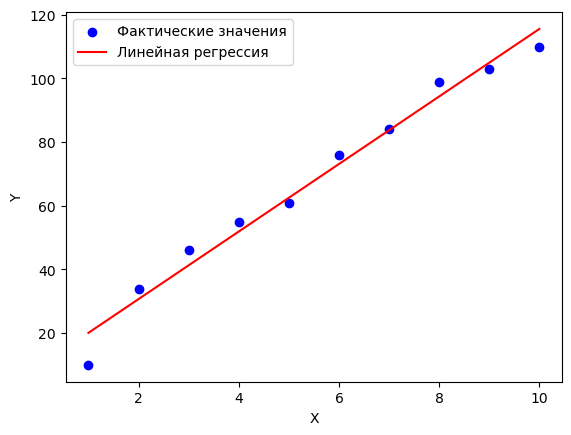

In [3]:
# Лабораторная работа №5
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Y = np.array([10, 34, 46, 55, 61, 76, 84, 99, 103, 110])

X = X.reshape(-1,1)

reg = LinearRegression().fit(X, Y)

# Предсказания для выборки Х
Y_pred = reg.predict(X)
# Выводим формулу линейной регрессии
a = reg.coef_[0]
b = reg.intercept_
print(f'Y = {round(a, 2)} + {round(b, 2)} * X + u')

# Вычисляем коэффициент детерминации R^2
k_det = reg.score(X, Y) # r2_score - ошибка
print(f'Коэффициент детерминации R^2: {round(k_det, 2)}')

plt.scatter(X, Y, color = 'blue', label = 'Фактические значения')
plt.plot(X, Y_pred, color = 'red', label = 'Линейная регрессия')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [2]:
# Лабораторная работа №6
import numpy as np
from scipy import stats

X = np.array([100, 129, 205, 134, 0, 130, 156, 130, 141])  # Москва
Y = np.array([98, 110, 102, 96, 97, 93, 101, 90, -110, 91, 94, 105])   # СПб
Z = np.array([56, 78, 96, 76, 69, 89, 61, 63, 60, 71, 68])  # Омск

# Стоимость не может быть нулевой или отрицательной
X = X[X > 0]
Y = Y[Y > 0]

# Тест Манна-Уитни для сравнения выборки X с выборкой Y, X с выборкой Z и Y со Z
stat_XY, p_XY = stats.mannwhitneyu(X, Y)
stat_XZ, p_XZ = stats.mannwhitneyu(X, Z)
stat_YZ, p_YZ = stats.mannwhitneyu(Y, Z)

print('Тест Манна-Уитни:\n'
      f'\nX и Y: p-value = {p_XY}'
      f'\nX и Z: p-value = {p_XZ}'
      f'\nY и Z: p-value = {p_YZ}')

# Тест Краскела-Уоллиса для сравнения всех трех выборок
stat, p = stats.kruskal(X, Y, Z)

print(f'\nТест Краскела-Уоллиса:\np-value = {p}\n')

alpha = 0.05

if p_XY < alpha:
    print('Цены на лекарство в городе Москва статистически значимо отличаются от цен в городе СПб')
elif p_XY >= alpha:
    print('Цены на лекарство в городе Москва не статистически значимо отличаются от цен в городе СПб')

if p_XZ < alpha:
    print('Цены на лекарство в городе Москва статистически значимо отличаются от цен в городе Омск')
elif p_XZ >= alpha:
    print('Цены на лекарство в городе Москва не статистически значимо отличаются от цен в городе Омск')

if p_YZ < alpha:
    print('Цены на лекарство в городе СПб статистически значимо отличаются от цен в городе Омск')
elif p_YZ >= alpha:
    print('Цены на лекарство в городе СПб не статистически значимо отличаются от цен в городе Омск')

if p < alpha:
    print('Цены на лекарство во всех трех городах статистически значимо отличаются')
elif p >= alpha:
    print('Цены на лекарство в трех городах не статистически значимо отличаются')

Тест Манна-Уитни:

X и Y: p-value = 0.0011022527417919228
X и Z: p-value = 0.0003263023399855958
Y и Z: p-value = 0.000266937342268643

Тест Краскела-Уоллиса:
p-value = 8.204872037367387e-06

Цены на лекарство в городе Москва статистически значимо отличаются от цен в городе СПб
Цены на лекарство в городе Москва статистически значимо отличаются от цен в городе Омск
Цены на лекарство в городе СПб статистически значимо отличаются от цен в городе Омск
Цены на лекарство во всех трех городах статистически значимо отличаются
